# Loan Default Prediction

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset 
df = pd.read_csv("Dataset (2).csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Preprocessing 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#checking the shape of the dataset
df.shape

(9578, 14)

<b> checking for null and missing values </b>

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<b> checking datatype of coumns</b>

In [6]:
# columns datatype
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

<b>checking duplicate values</b>

In [7]:
# duplicate values
df.duplicated().sum()

0

<b>Descriptive Statistics</b>

In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
for column in df.columns:
    print(column,":",df[column].unique())
    print("*"*20)

credit.policy : [1 0]
********************
purpose : ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
********************
int.rate : [0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.

<b>Outlier Analysising</b>

In [10]:
df_list = df.drop(columns=['credit.policy','purpose','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid'])

In [11]:
df_list.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5


In [12]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


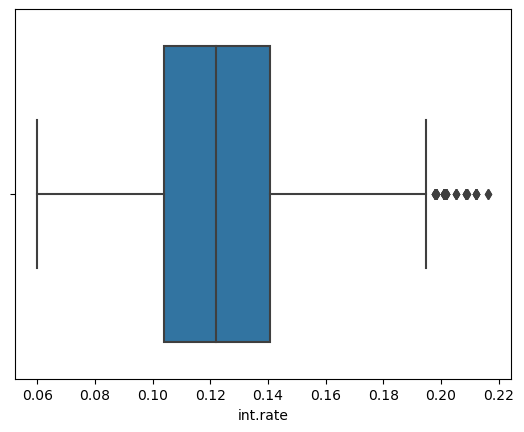

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


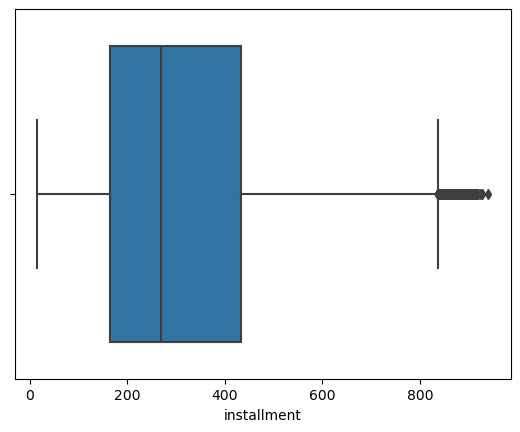

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


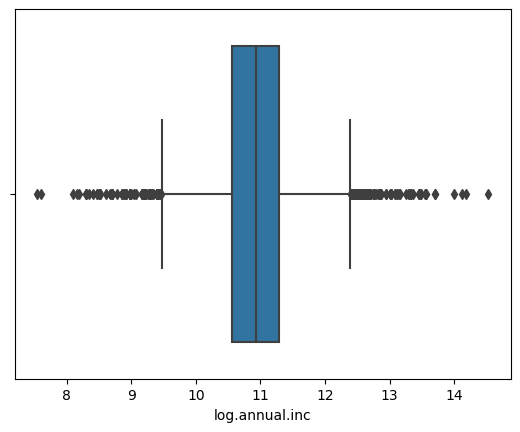

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


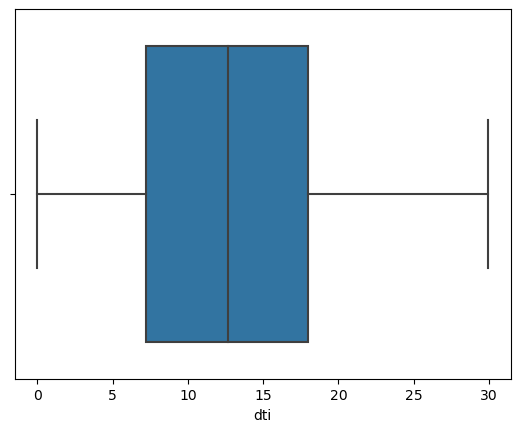

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


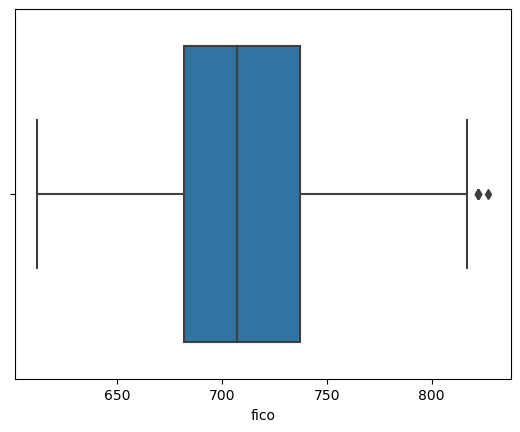

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


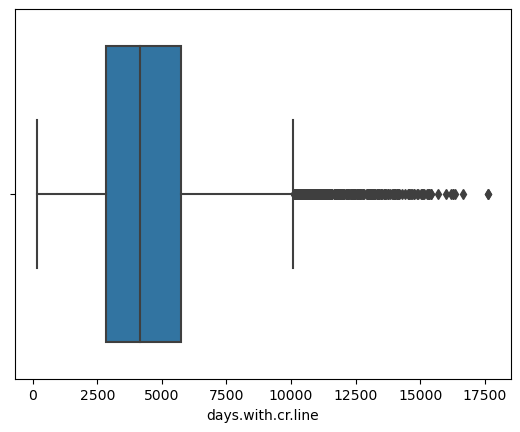

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


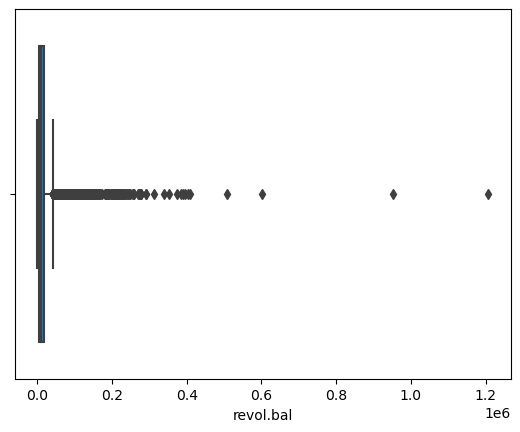

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


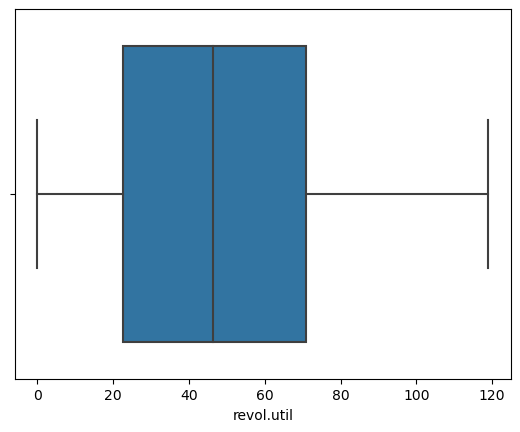

In [13]:
for column in df_list.columns:
    sns.boxplot(column,data=df_list)
    plt.show()

In [14]:
# There are outliers in 'int.rate','installment','log.annual.inc','fico','days.with.cr.line',and 'revol.bal'. 
# As of now, lets proceed the data without outlier treatment.

# Explorative Data Analysis 

In the exploratory data analysis, I will be looking at the distribution of the data, the
coorelation between features and the target variable and the relationship between the
features and the target variable. I will start by looking at the distribution of the data,
followed by the relationship between the features and the target variable.

In [15]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [17]:
cat_cols = ['credit.policy','purpose','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']
con_cols = list(set(df.columns)-set(cat_cols)) 
print("continuous:", con_cols)
print("categorical:",cat_cols) 

continuous: ['days.with.cr.line', 'installment', 'int.rate', 'revol.bal', 'log.annual.inc', 'revol.util', 'fico', 'dti']
categorical: ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


<h3>Univariate Anlaysis</h3>

<b> Continuous Data - Histogram or KDE </b>

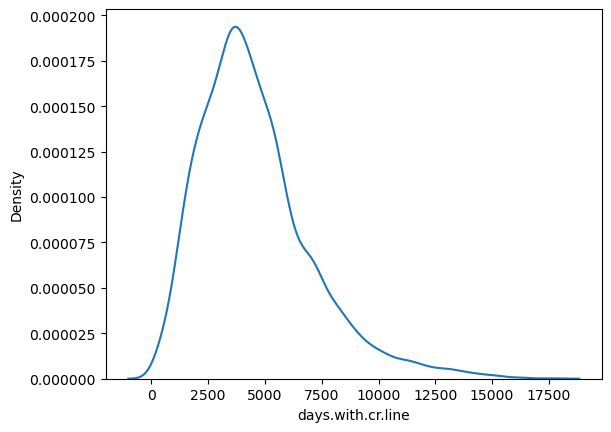

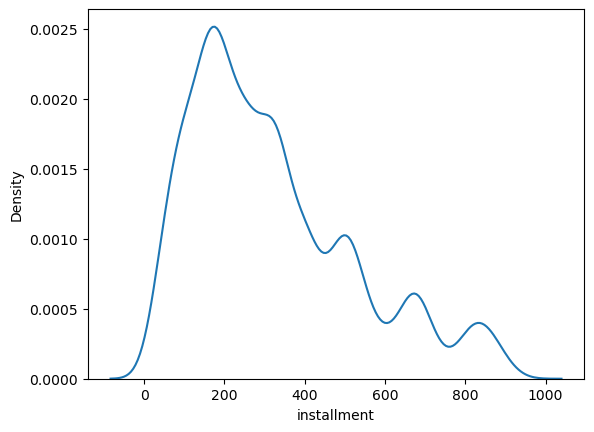

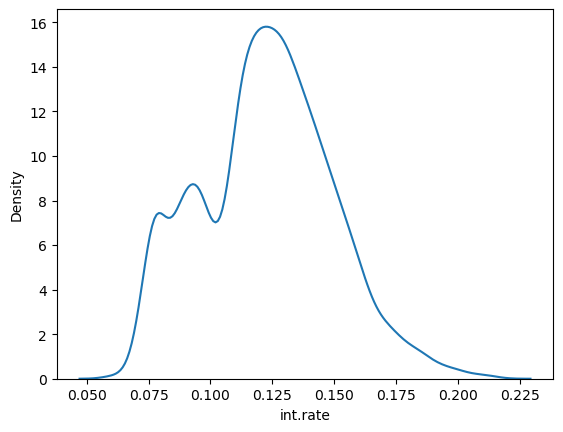

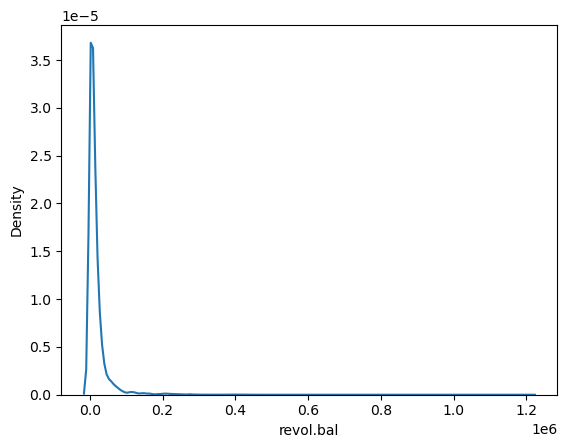

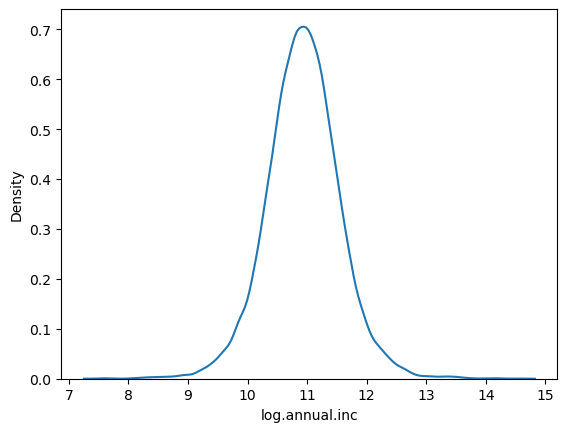

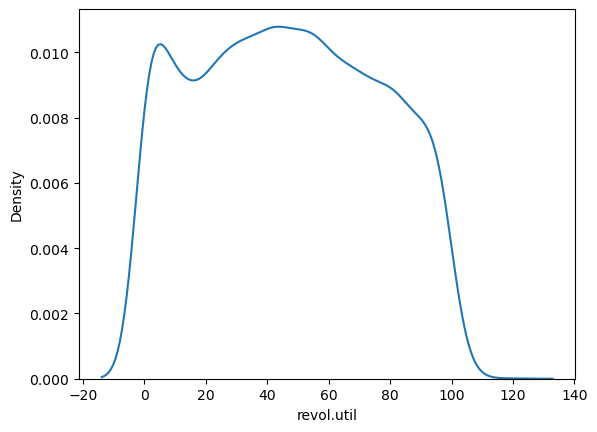

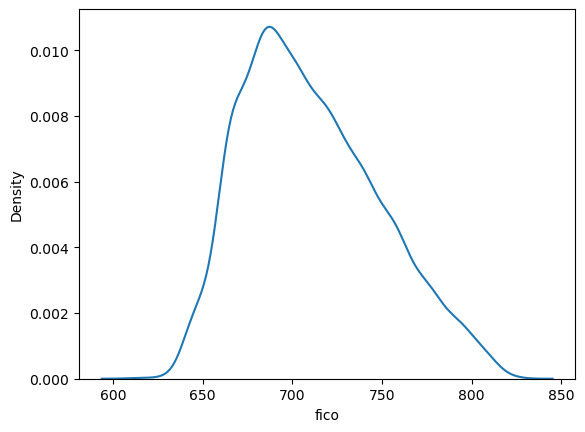

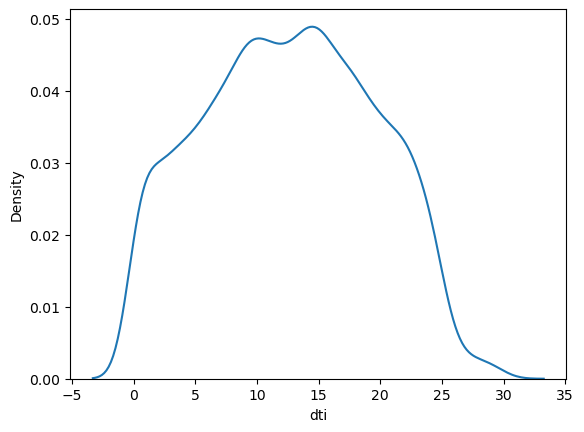

In [18]:
for col in con_cols:
    sns.kdeplot(x=col,data=df)
    plt.show()

In [19]:
for col in con_cols:
    print(col,":", df[col].skew())

days.with.cr.line : 1.1557482270969546
installment : 0.9125224624010233
int.rate : 0.16441991354447316
revol.bal : 11.161058494625456
log.annual.inc : 0.028668106570220064
revol.util : 0.05998544258288086
fico : 0.4712597399323796
dti : 0.023941022949340144


In [20]:
# revol.bal,installment, and days.with.cr.line  are right skewed 

<b> Categorical Data - Bar graphs</b>

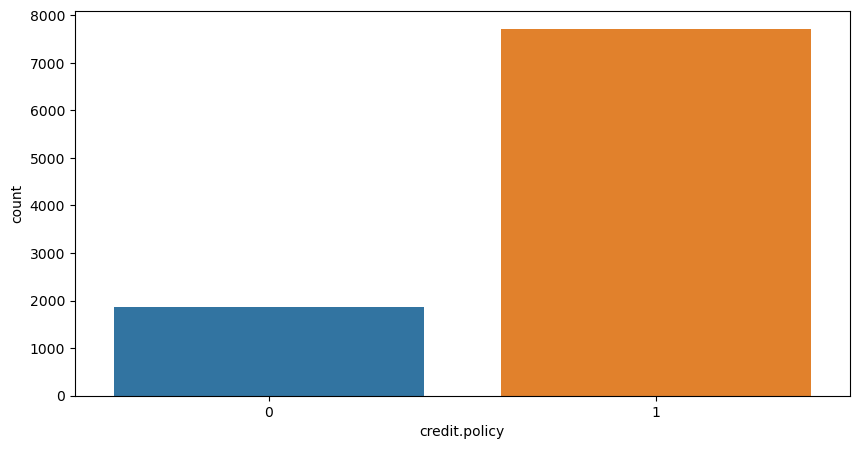

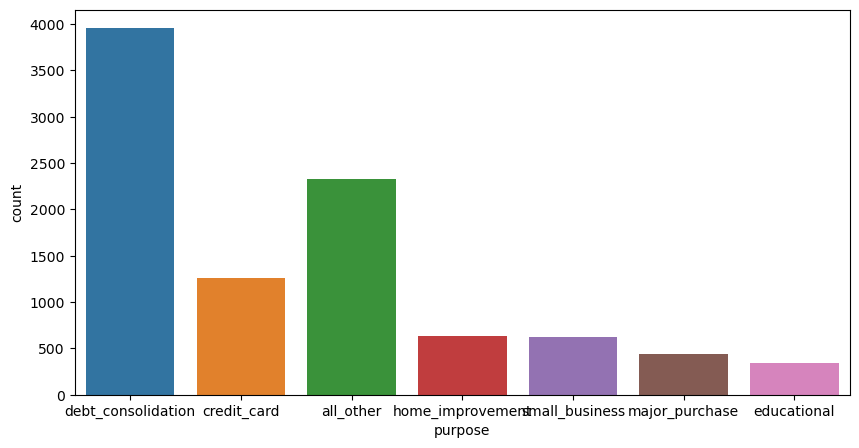

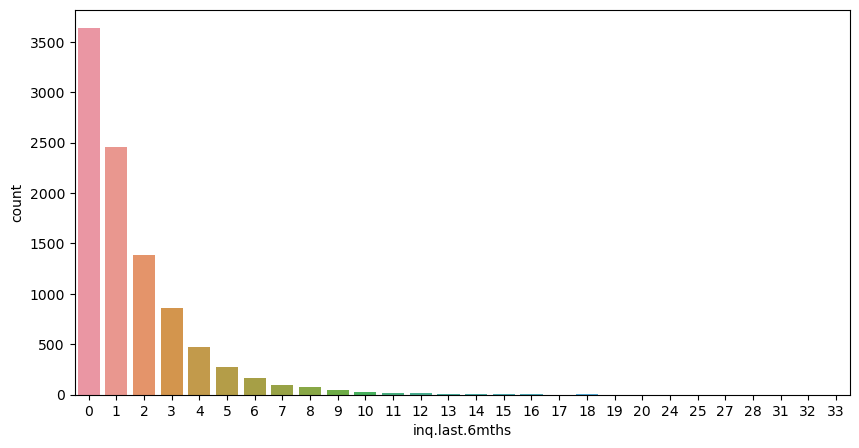

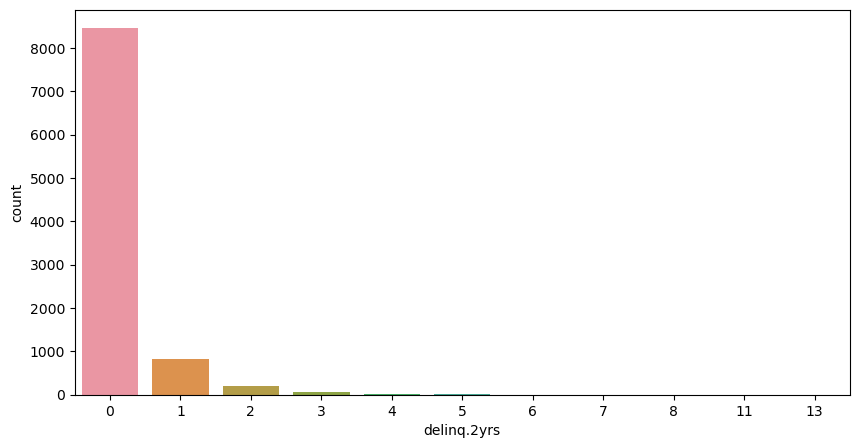

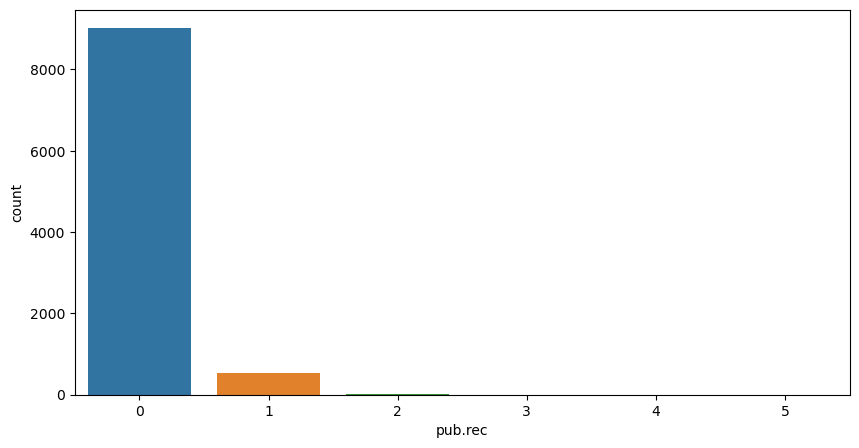

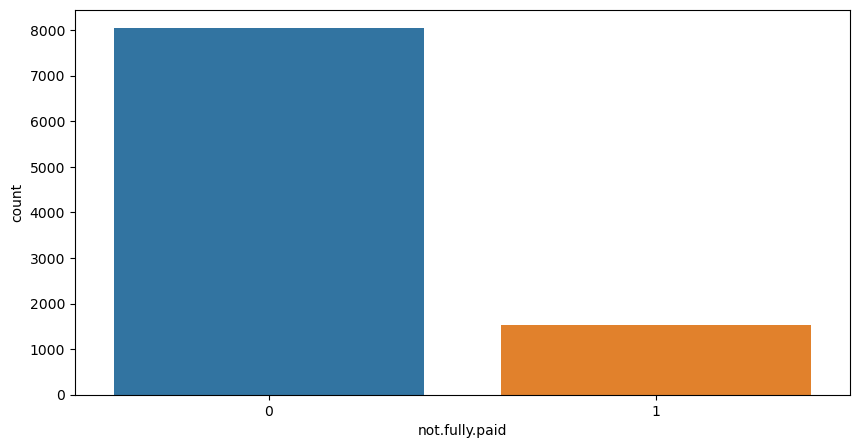

In [21]:

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,data=df)
    plt.show()

In [22]:
for col in cat_cols:
    print(col,":")
    print( df[col].value_counts(normalize=True).round(2))
    print("*"*50)

credit.policy :
1    0.8
0    0.2
Name: credit.policy, dtype: float64
**************************************************
purpose :
debt_consolidation    0.41
all_other             0.24
credit_card           0.13
home_improvement      0.07
small_business        0.06
major_purchase        0.05
educational           0.04
Name: purpose, dtype: float64
**************************************************
inq.last.6mths :
0     0.38
1     0.26
2     0.14
3     0.09
4     0.05
5     0.03
6     0.02
7     0.01
8     0.01
9     0.00
10    0.00
11    0.00
12    0.00
15    0.00
13    0.00
14    0.00
18    0.00
16    0.00
19    0.00
24    0.00
17    0.00
33    0.00
20    0.00
27    0.00
25    0.00
28    0.00
31    0.00
32    0.00
Name: inq.last.6mths, dtype: float64
**************************************************
delinq.2yrs :
0     0.88
1     0.09
2     0.02
3     0.01
4     0.00
5     0.00
6     0.00
13    0.00
7     0.00
8     0.00
11    0.00
Name: delinq.2yrs, dtype: float64
*****************

In [23]:
# Inferences

# 1) mostly credit.policy 1 is applied for user.
# 2) inq.last.6mths is mostly has between 0 to 3.
# 3) purpose of loan is 'debt_consolidation', 'credit_card' and 'all_other'.
# 4) delinq.2yrs, pub.rec, and not.fully.paid are mostly has 0.


<h3>Bivariate Analysis</h3>

In [24]:
# Target Variable Vs Independent variable

# Default vs Other variable

In [25]:
# Target vs Continuous data

# Categorical vs Continuous data

# box plot

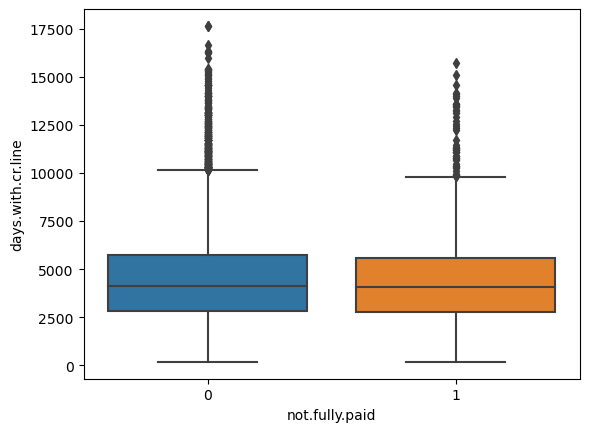

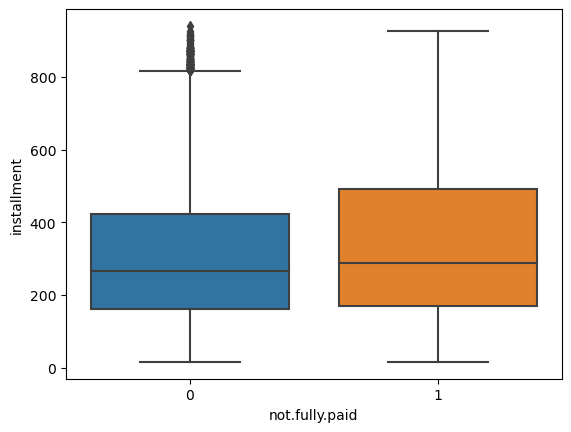

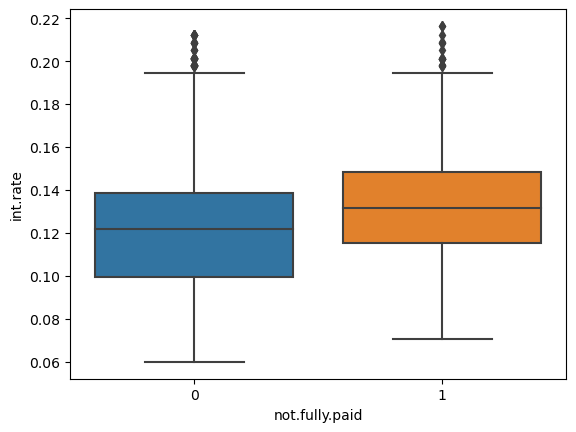

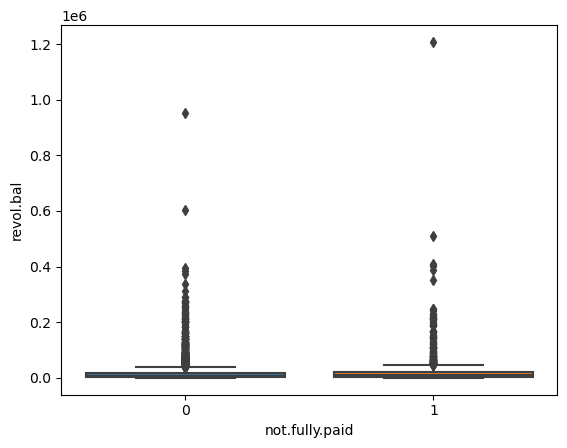

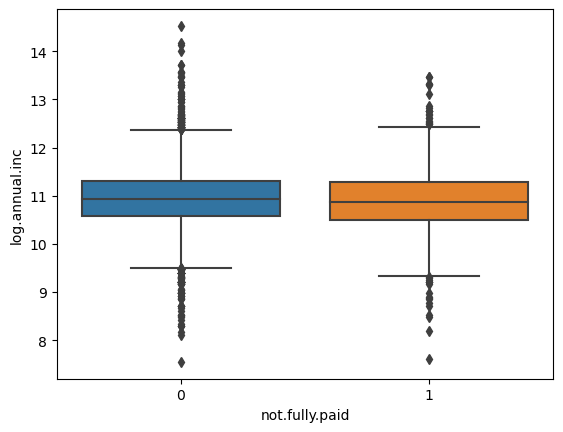

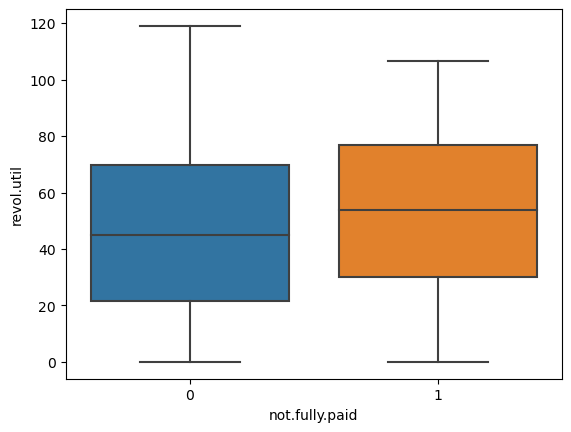

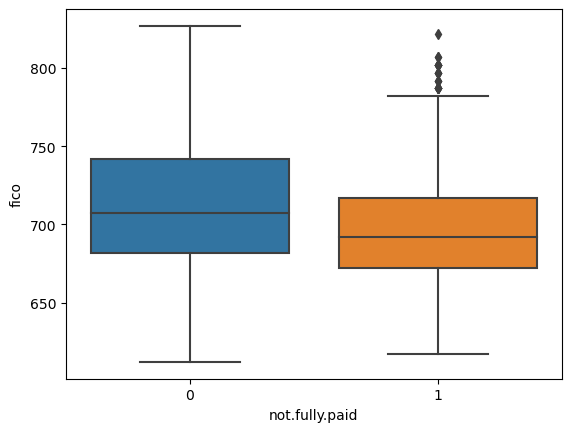

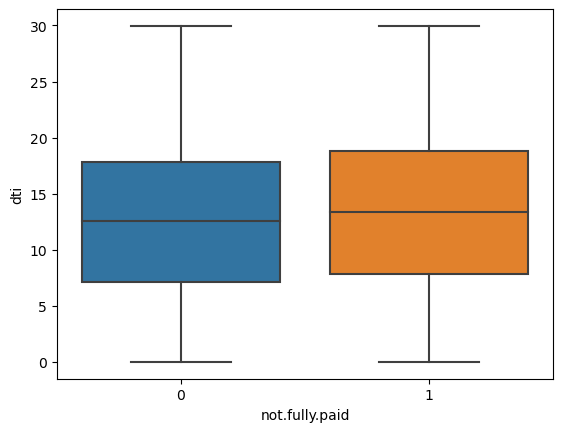

In [26]:
for col in con_cols:
    sns.boxplot(x='not.fully.paid', y=col, data=df)
    plt.show()

In [27]:
# 'fico' of 'not.fully.paid' is lower than 'fully.paid'
# 'revol.util', 'int.rate' of 'not.fully.paid' is higher than 'fully.paid'
# Other has no impact on 'not.fully.paid'

In [28]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [29]:
# Target vs Categorical data

# Categorical vs Categorical data

# Stacked bar plot

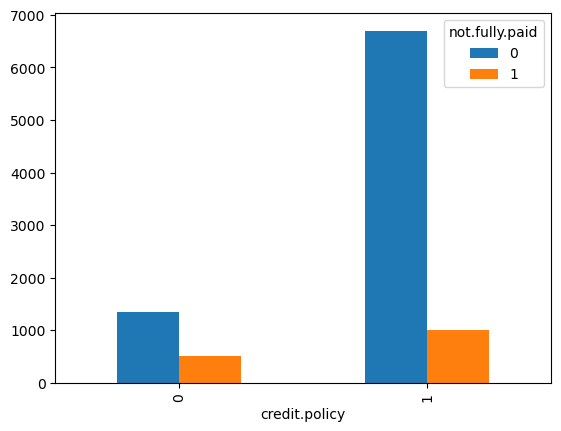

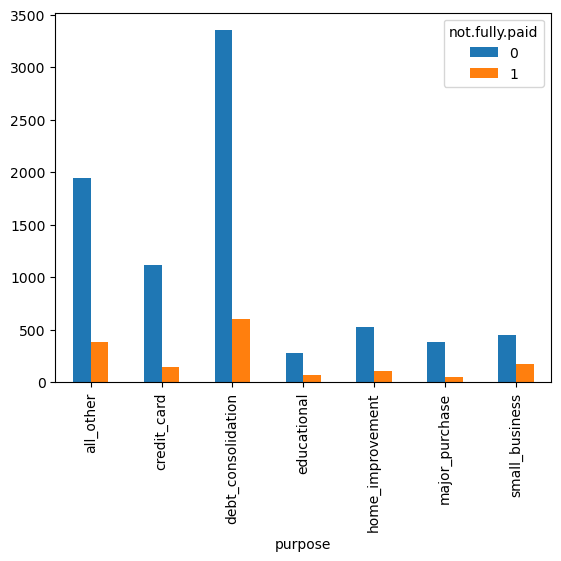

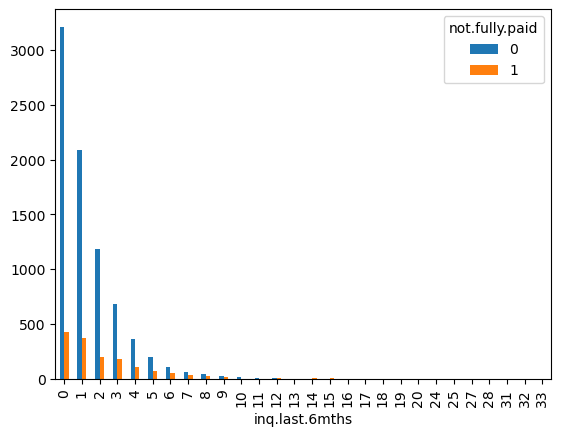

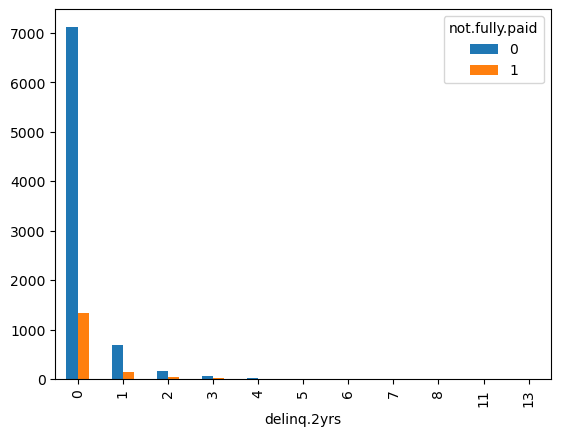

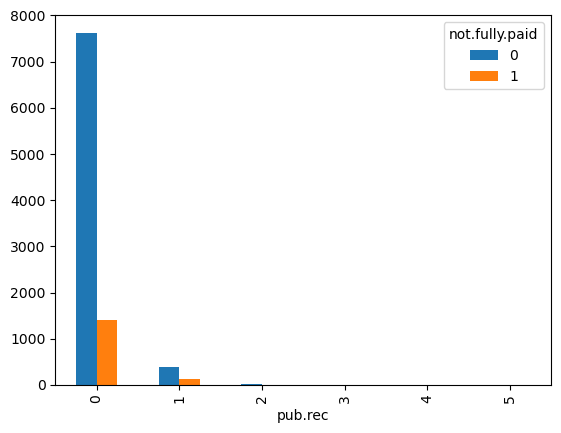

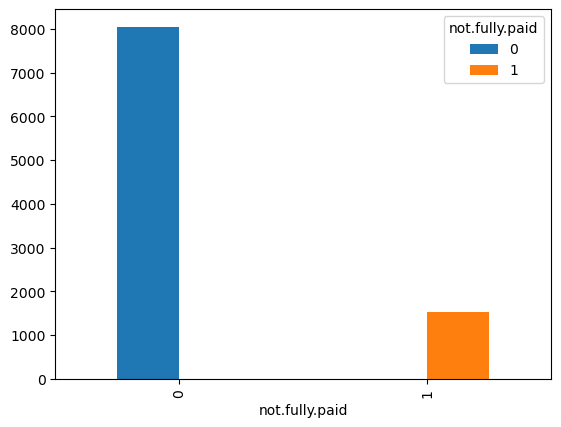

In [30]:
for col in cat_cols:
    pd.crosstab(df[col],df['not.fully.paid']).plot(kind='bar')
    plt.show()

In [31]:
# 'credit.policy': 1, 'purpose':'debt_consolidation', and 'all_other', 'inq.last.6mths': 0 - 3, 'delinq.2yrs': 0, 
# 'pub.rec': 0 are having more defaulter count.

<h1> Data Preprocessing-2 </h1>

# Coorelation Matrix Heatmap

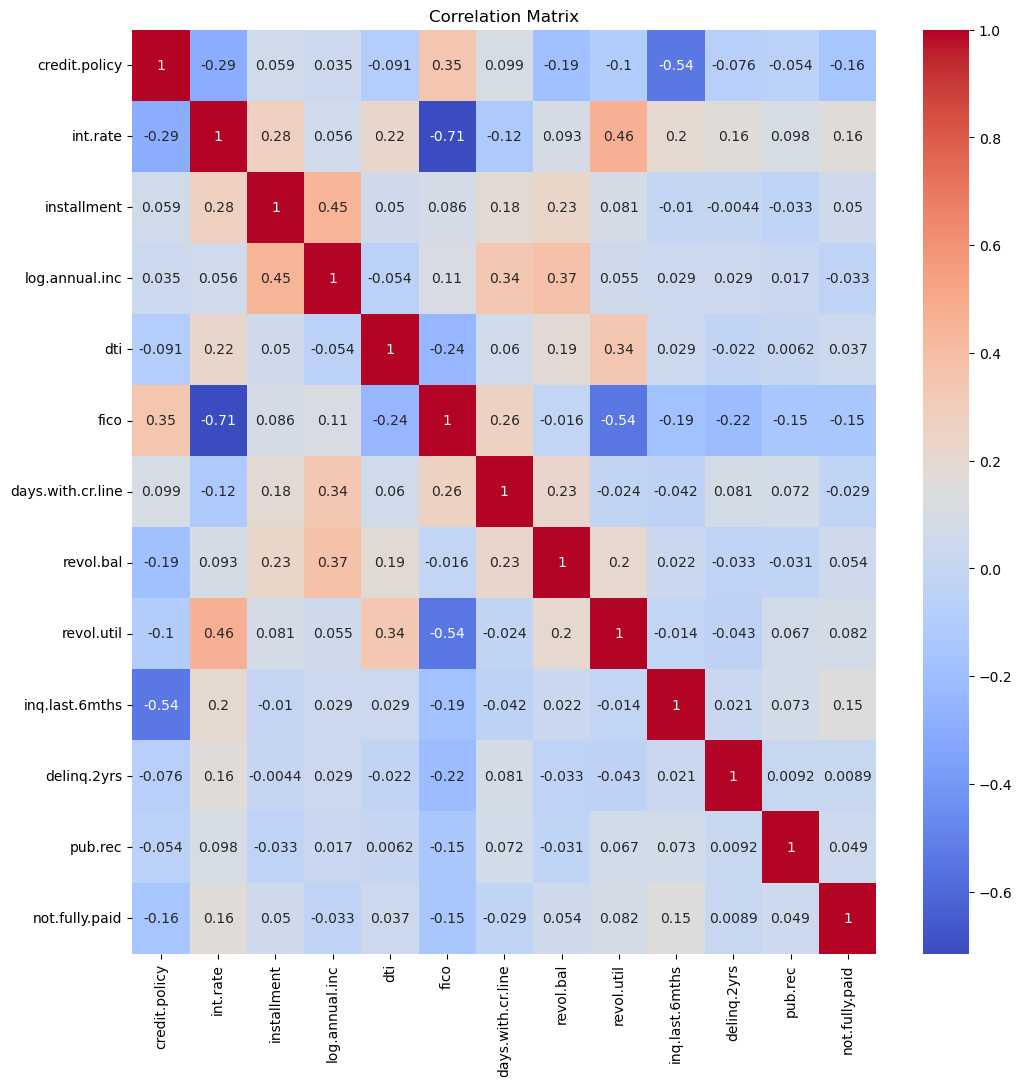

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
# 'credit.policy', 'log.annual.inc',and 'days.with.cr.line' are negatively correlated with 'not.fully.paid'.
# 'int.rate', 'revol.util' and 'inq.last.6mths' are positively correlated with 'not.fully.paid'.
# All other have no significant coorelation with  not.fully.paid'. So, I will proceed to model building.

In [34]:
# Correlation between all the columns of DataFrame.
#df2 = df.corr()
#print(df2)

## Scaling

In [35]:
# Scaling  - Continuous data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss = StandardScaler()
x_con_scaled = pd.DataFrame(ss.fit_transform(df[con_cols]), columns=con_cols, index = df.index)
x_con_scaled.head()

,days.with.cr.line,installment,int.rate,revol.bal,log.annual.inc,revol.util,fico,dti
0,0.432230,2.463099,-0.139318,0.353732,0.680388,0.182704,0.688825,0.998505
1,-0.721230,-0.438854,-0.578868,0.495018,0.244031,1.030602,-0.101303,0.244540
2,0.059770,0.230708,0.486484,-0.397073,-0.908659,-0.730683,-0.759742,-0.141885
3,-0.745277,-0.757022,-0.813544,0.496321,0.680388,0.909966,0.030385,-0.654697
4,-0.198161,-1.043992,0.743509,-0.360663,0.597961,-0.251586,-1.154806,0.343326


## Encoding

In [38]:
# Categorical data - Numerical Data

# One hot encoding

In [39]:
cat_cols.remove('not.fully.paid')

In [40]:
cat_cols

['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

In [41]:
# function to execute one hot encoding 
x_col_enc = pd.get_dummies(df[cat_cols], drop_first=True)

## Marge Cat and Con Data

In [42]:
x_final = pd.concat([x_con_scaled, x_col_enc], axis=1)
x_final

,days.with.cr.line,installment,int.rate,revol.bal,log.annual.inc,revol.util,fico,dti,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.432230,2.463099,-0.139318,0.353732,0.680388,0.182704,0.688825,0.998505,1,0,0,0,0,1,0,0,0,0
1,-0.721230,-0.438854,-0.578868,0.495018,0.244031,1.030602,-0.101303,0.244540,1,0,0,0,1,0,0,0,0,0
2,0.059770,0.230708,0.486484,-0.397073,-0.908659,-0.730683,-0.759742,-0.141885,1,1,0,0,0,1,0,0,0,0
3,-0.745277,-0.757022,-0.813544,0.496321,0.680388,0.909966,0.030385,-0.654697,1,1,0,0,0,1,0,0,0,0
4,-0.198161,-1.043992,0.743509,-0.360663,0.597961,-0.251586,-1.154806,0.343326,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,2.368325,0.123976,0.873884,5.879467,2.031030,1.216726,-1.023118,-0.322023,0,2,0,0,0,0,0,0,0,0
9574,-0.072400,-0.296481,0.099083,-0.495638,0.341170,-1.575135,0.293761,-1.800898,0,5,0,0,0,0,0,0,0,0
9575,-0.444860,-1.068670,-0.578868,-0.203765,-0.545694,1.244300,-0.628054,0.070213,0,8,0,0,0,1,0,0,0,0
9576,-1.105722,0.156914,1.391660,-0.501089,-0.182730,-1.502753,-0.496366,0.954924,0,5,0,0,0,0,0,1,0,0


# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y = df['not.fully.paid']

In [45]:
# Training = 80%, Testing = 20% ( Random Selection of train_test_split)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42)

# Implementation of Decision Tree Classifiere

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_classifire = DecisionTreeClassifier(criterion='gini')
dt_classifire.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
from sklearn import tree

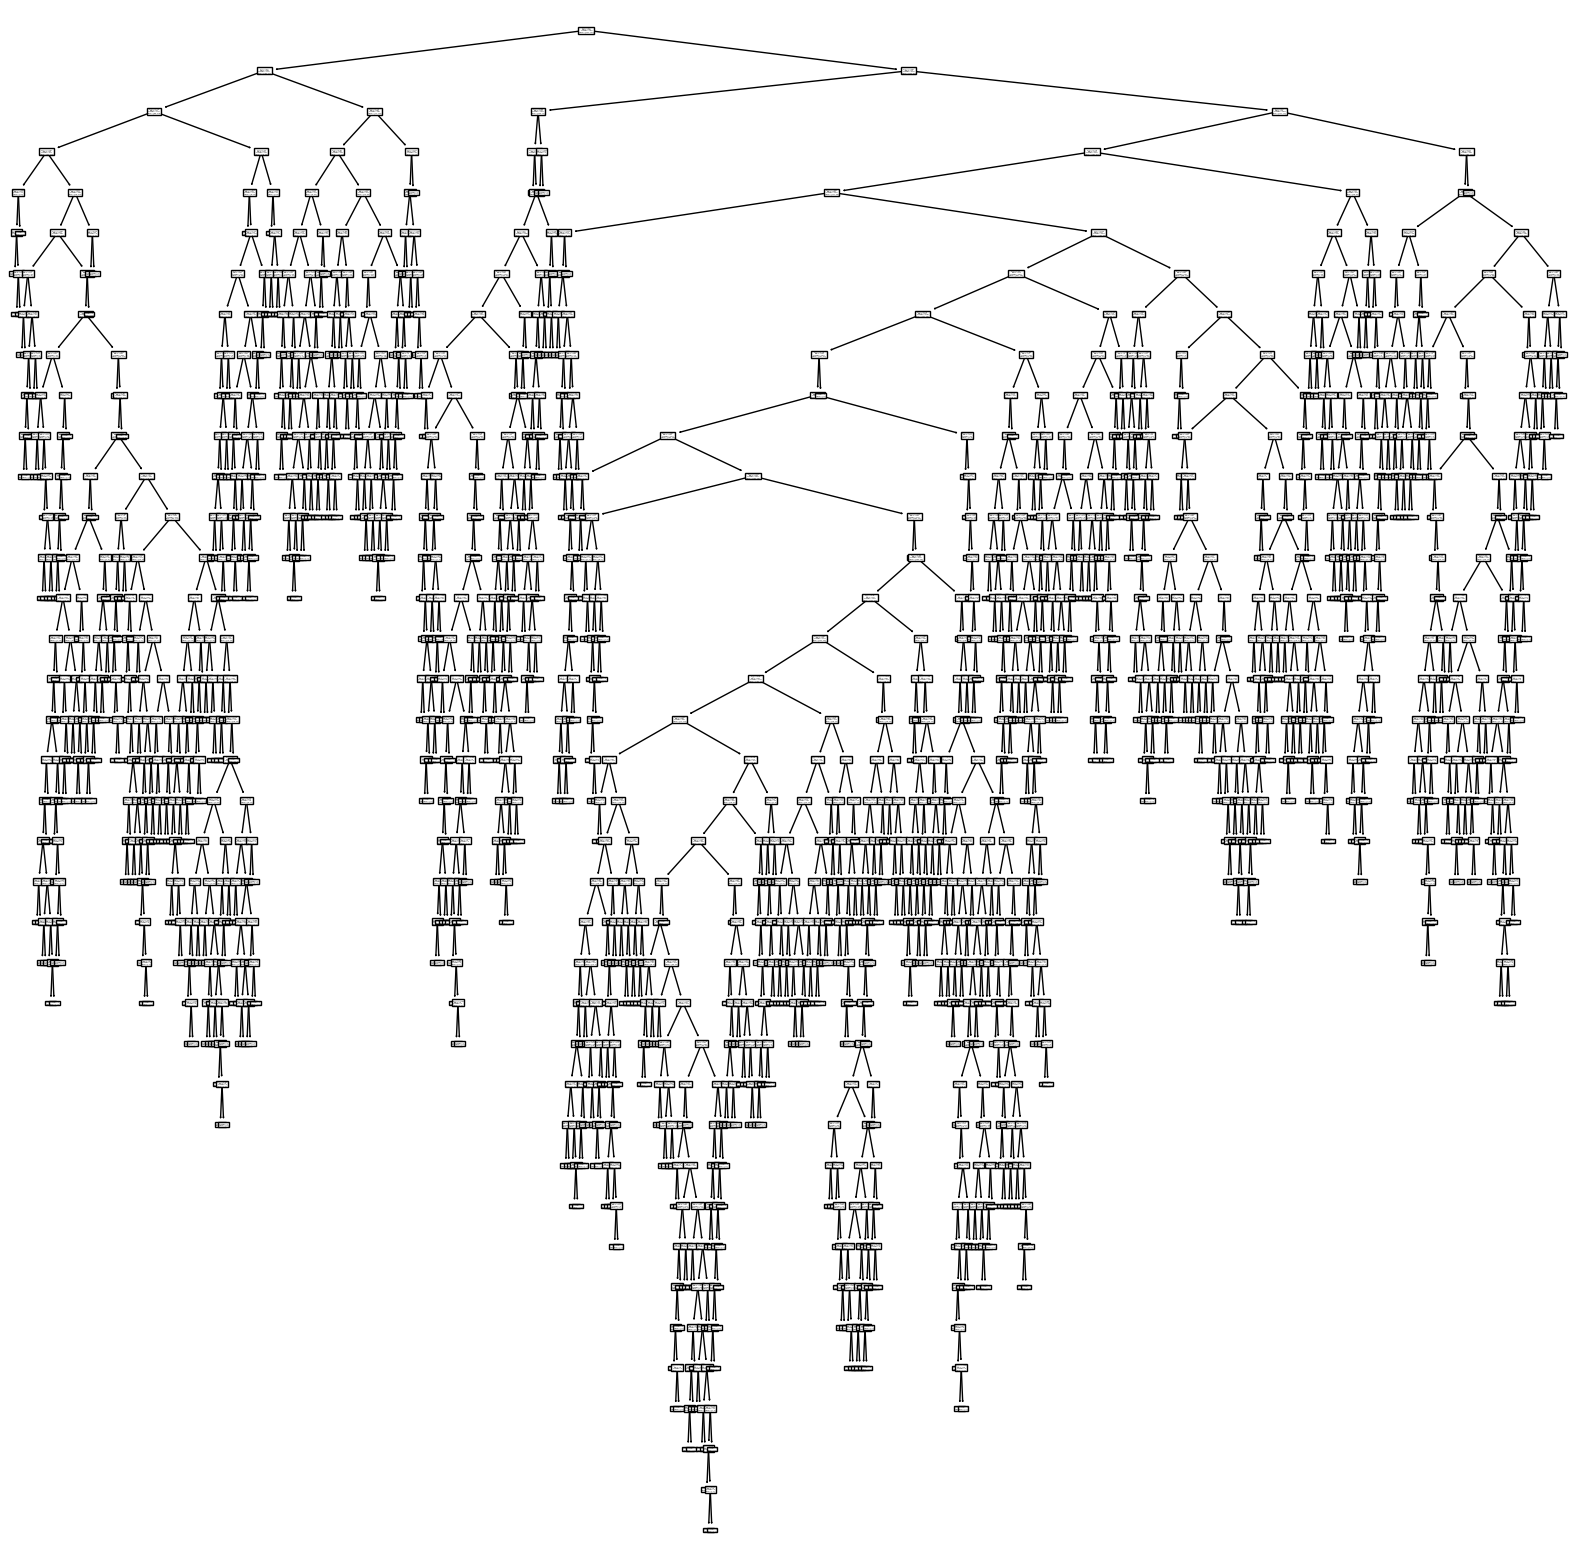

In [50]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_classifire)
plt.show()

## Train & Test Score

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
y_train_pred = dt_classifire.predict(X_train)
y_test_pred = dt_classifire.predict(X_test)

Train Confusion Matrix


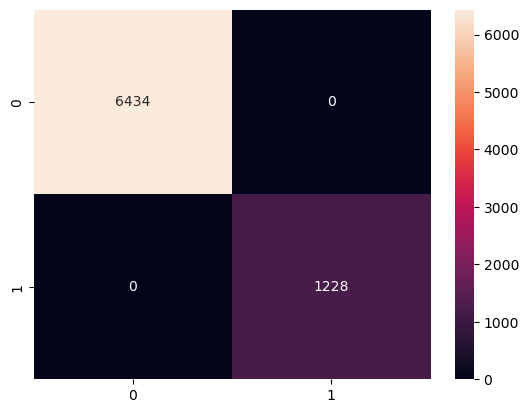

Test Confusion Matrix


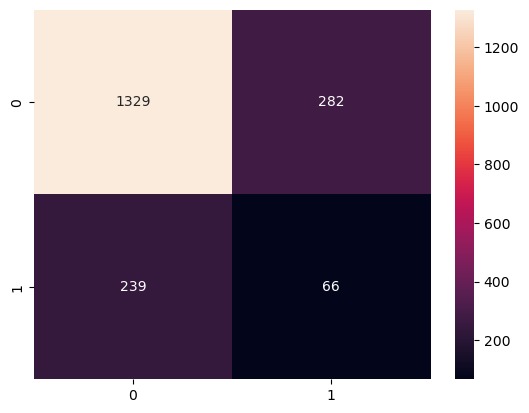

In [53]:
print('Train Confusion Matrix')
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='.0f')
plt.show()

print('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='.0f')
plt.show()

In [54]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print('-'*100)

print('Test Classification Report:')
print(classification_report(y_test,y_test_pred))
print('-'*100)

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6434
           1       1.00      1.00      1.00      1228

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

----------------------------------------------------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1611
           1       0.19      0.22      0.20       305

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.74      1916

----------------------------------------------------------------------------------------------------


In [55]:
# Full grown decision tree will always overfit.

### Distribution Plot

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not.fully.paid', ylabel='Density'>

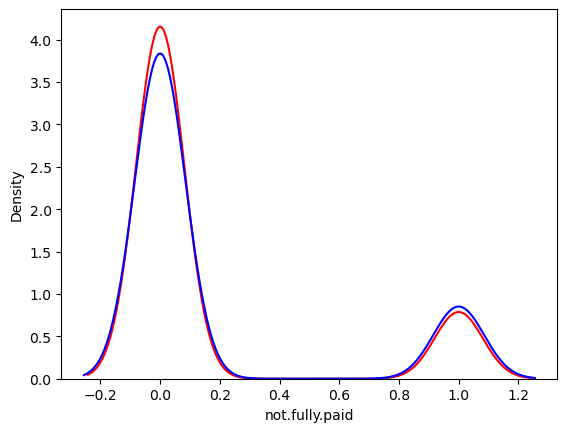

In [56]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

# Cross Validation Score

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
scores = cross_val_score(dt_classifire, X_train, y_train, scoring='recall', cv=5)
print('Score:', scores)
print('Avg. Score', np.mean(scores))
print('Std. Score', np.std(scores))

Score: [0.19512195 0.26829268 0.23265306 0.18367347 0.2195122 ]
Avg. Score 0.21985067197610753
Std. Score 0.029768922652236178


# Hyperparameter Tuning for Decision Tree Classifier

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
#defining parameter range
grid = {'max_depth':range(1,10), 'min_samples_split': range(4,8,1), 
       'max_leaf_nodes':range(3,10,1)}

#Creating grid search object
grid_src = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=grid, cv=5,scoring= 'recall')

#Fitting the grid search object to the training data
grid_src.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(3, 10),
                         'min_samples_split': range(4, 8)},
             scoring='recall')

In [61]:
#Printing the best parameters
print('Best parameters found: ', grid_src.best_params_)

print('Best cv result found: ',grid_src.cv_results_)

Best parameters found:  {'max_depth': 1, 'max_leaf_nodes': 3, 'min_samples_split': 4}
Best cv result found:  {'mean_fit_time': array([0.02665515, 0.02285962, 0.01989112, 0.02429581, 0.02288685,
       0.0201272 , 0.05518298, 0.02057438, 0.0206666 , 0.02052813,
       0.01941161, 0.02048831, 0.01820903, 0.01926537, 0.01864924,
       0.03539014, 0.02481084, 0.0202003 , 0.01738315, 0.01572022,
       0.02080097, 0.01726284, 0.01889787, 0.02316356, 0.02451186,
       0.02403588, 0.01805348, 0.01710863, 0.02978039, 0.03873844,
       0.02505212, 0.02738051, 0.02986279, 0.03217449, 0.0343483 ,
       0.03147664, 0.0285635 , 0.02270637, 0.02363091, 0.02164903,
       0.02348819, 0.02598195, 0.02869883, 0.02536607, 0.02274213,
       0.02558393, 0.02331367, 0.02170777, 0.02397981, 0.0271843 ,
       0.02419219, 0.02495246, 0.02588887, 0.02288136, 0.02341523,
       0.02388167, 0.03163009, 0.03027244, 0.03216009, 0.03119173,
       0.05028338, 0.04626184, 0.04183617, 0.03414021, 0.046034  ,
  

In [62]:
pd.DataFrame(grid_src.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026655,0.007370,0.008489,0.002490,1,3,4,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",0.939024,0.951220,0.926531,0.934694,0.934959,0.937286,0.008062,1
1,0.022860,0.002722,0.010169,0.001612,1,3,5,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",0.939024,0.951220,0.926531,0.934694,0.934959,0.937286,0.008062,1
2,0.019891,0.002232,0.005341,0.003238,1,3,6,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",0.939024,0.951220,0.926531,0.934694,0.934959,0.937286,0.008062,1
3,0.024296,0.003564,0.006916,0.003494,1,3,7,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",0.939024,0.951220,0.926531,0.934694,0.934959,0.937286,0.008062,1
4,0.022887,0.002695,0.010446,0.000603,1,4,4,"{'max_depth': 1, 'max_leaf_nodes': 4, 'min_sam...",0.939024,0.951220,0.926531,0.934694,0.934959,0.937286,0.008062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.054430,0.002420,0.008323,0.002452,9,8,7,"{'max_depth': 9, 'max_leaf_nodes': 8, 'min_sam...",0.601626,0.626016,0.510204,0.465306,0.467480,0.534126,0.067454,45
248,0.059757,0.004088,0.005080,0.002057,9,9,4,"{'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...",0.613821,0.609756,0.526531,0.469388,0.467480,0.537395,0.064356,29
249,0.056372,0.004446,0.006783,0.002719,9,9,5,"{'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...",0.613821,0.609756,0.526531,0.469388,0.467480,0.537395,0.064356,29
250,0.059781,0.003364,0.007889,0.003143,9,9,6,"{'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...",0.613821,0.609756,0.526531,0.469388,0.467480,0.537395,0.064356,29


In [63]:
grid_src.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=1, max_leaf_nodes=3,
                       min_samples_split=4)

# Performance Matrics

In [64]:
dt_tunned = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=8, 
                                   min_samples_split=5, class_weight='balanced')
dt_tunned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=8,
                       min_samples_split=5)

### Train & Test Score

In [65]:
y_train_pred = dt_tunned.predict(X_train)
y_test_pred = dt_tunned.predict(X_test)

Train Confusion Matrix


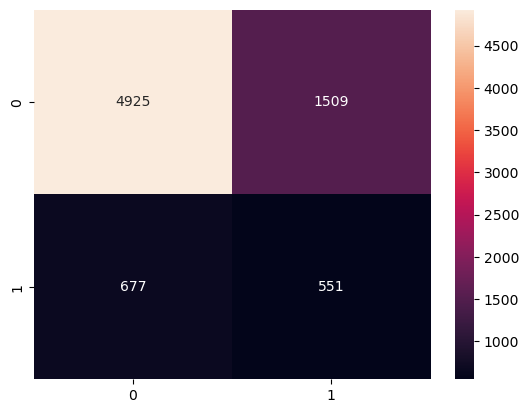

Test Confusion Matrix


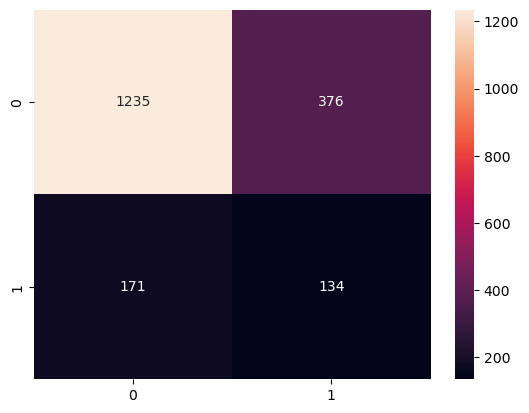

In [66]:
print('Train Confusion Matrix')
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='.0f')
plt.show()

print('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='.0f')
plt.show()

In [67]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print('-'*100)

print('Test Classification Report:')
print(classification_report(y_test,y_test_pred))
print('-'*100)

Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6434
           1       0.27      0.45      0.34      1228

    accuracy                           0.71      7662
   macro avg       0.57      0.61      0.58      7662
weighted avg       0.78      0.71      0.74      7662

----------------------------------------------------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1611
           1       0.26      0.44      0.33       305

    accuracy                           0.71      1916
   macro avg       0.57      0.60      0.57      1916
weighted avg       0.78      0.71      0.74      1916

----------------------------------------------------------------------------------------------------


In [68]:
# Before HT:

# Train Recall - 100%
# Test Recall - 21%

# After HT:

# Train Recall - 45%
# Test Recall - 44%

# Handled the overfitting and built and generalized model

### Distribution Plot

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not.fully.paid', ylabel='Density'>

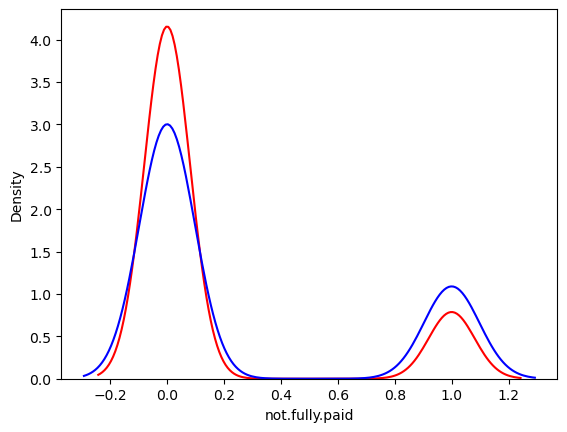

In [69]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

### Cross Validation Score

In [70]:
scores = cross_val_score(dt_tunned, X_train, y_train, scoring='recall', cv=5)
print('Score:', scores)
print('Avg. Score', np.mean(scores))
print('Std. Score', np.std(scores))

Score: [0.43089431 0.44715447 0.35102041 0.42857143 0.43495935]
Avg. Score 0.41851999336319895
Std. Score 0.03435268493720224


In [71]:
# Hyperparameter tuning is mandatory in Decision Tree. 
# If we go with default values, we will get a full grown 
# Decision Tree which will overfit.

# Ensemble Methods

## Bagging Classifier

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [73]:
bag_class_log = BaggingClassifier(base_estimator=LogisticRegression(),
                                 n_estimators=20, max_samples=0.8, max_features=0.5,
                                 bootstrap=True, bootstrap_features=False)
bag_class_log.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.5,
                  max_samples=0.8, n_estimators=20)

In [74]:
# To Find the best parameters, perform Grid Search

### Train & Test Score

In [75]:
y_train_pred = bag_class_log.predict(X_train)
y_test_pred = bag_class_log.predict(X_test)

Train Confusion Matrix


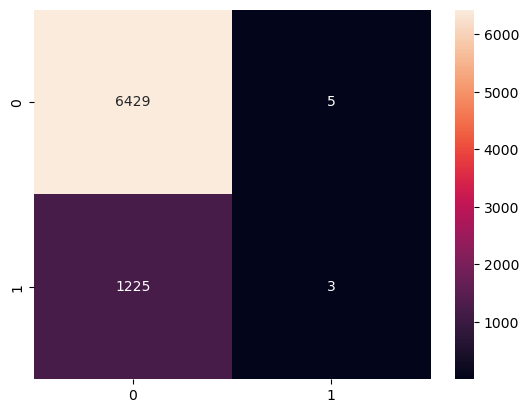

Test Confusion Matrix


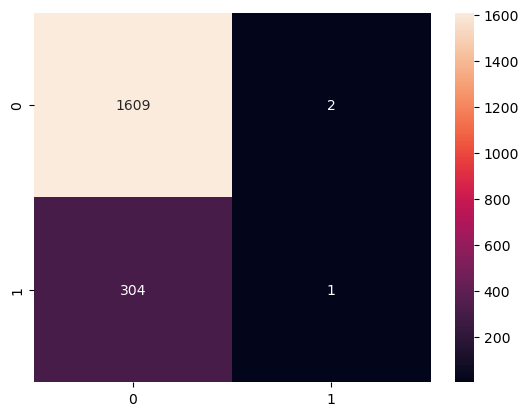

In [76]:
print('Train Confusion Matrix')
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='.0f')
plt.show()

print('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='.0f')
plt.show()

In [77]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print('-'*100)

print('Test Classification Report:')
print(classification_report(y_test,y_test_pred))
print('-'*100)

Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6434
           1       0.38      0.00      0.00      1228

    accuracy                           0.84      7662
   macro avg       0.61      0.50      0.46      7662
weighted avg       0.77      0.84      0.77      7662

----------------------------------------------------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.33      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.59      0.50      0.46      1916
weighted avg       0.76      0.84      0.77      1916

----------------------------------------------------------------------------------------------------


In [78]:
# After Bagging Classifier:

# Train Recall - 0%
# Test Recall - 0%

# Handled the overfitting and built and generalized model

### Distribution Plot

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not.fully.paid', ylabel='Density'>

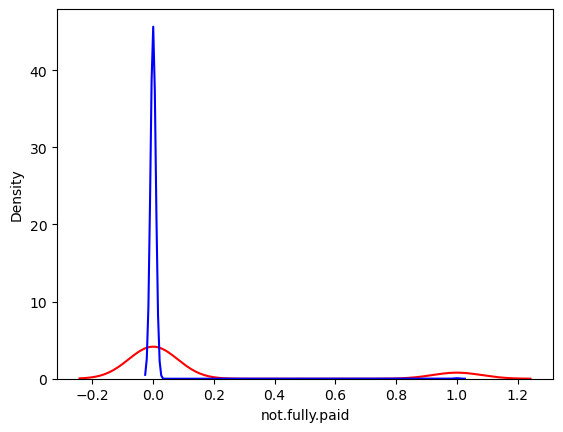

In [79]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

### Cross Validation Score

In [80]:
scores = cross_val_score(bag_class_log, X_train, y_train, scoring='recall', cv=5)
print('Score:', scores)
print('Avg. Score', np.mean(scores))
print('Std. Score', np.std(scores))

Score: [0.         0.         0.0122449  0.         0.00406504]
Avg. Score 0.0032619877219180354
Std. Score 0.004759396222853435


# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
#creating Random Forest Classifer object
rf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5,
                           min_samples_split=4, max_leaf_nodes=8, max_samples=0.7,
                           max_features=0.5, bootstrap=True, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.5,
                       max_leaf_nodes=8, max_samples=0.7, min_samples_split=4,
                       n_estimators=150)

### Train & Test Score

In [83]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Train Confusion Matrix


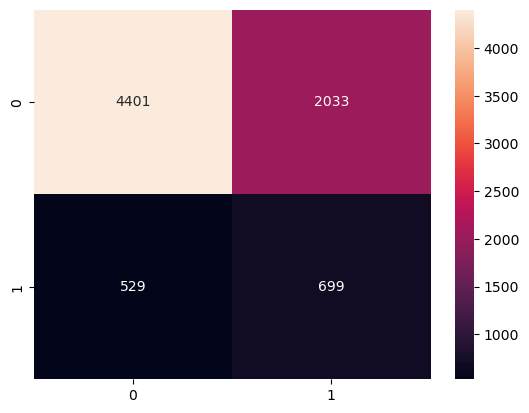

Test Confusion Matrix


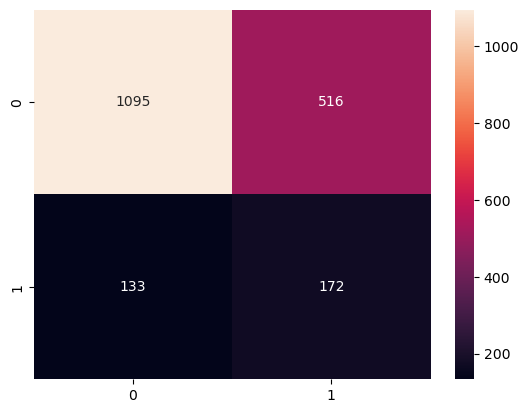

In [84]:
print('Train Confusion Matrix')
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='.0f')
plt.show()

print('Test Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='.0f')
plt.show()

In [85]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print('-'*100)

print('Test Classification Report:')
print(classification_report(y_test,y_test_pred))
print('-'*100)

Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      6434
           1       0.26      0.57      0.35      1228

    accuracy                           0.67      7662
   macro avg       0.57      0.63      0.56      7662
weighted avg       0.79      0.67      0.71      7662

----------------------------------------------------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1611
           1       0.25      0.56      0.35       305

    accuracy                           0.66      1916
   macro avg       0.57      0.62      0.56      1916
weighted avg       0.79      0.66      0.70      1916

----------------------------------------------------------------------------------------------------


In [86]:
# After Bagging Classifier:

# Train Recall - 58%
# Test Recall - 56%

# Handled the overfitting and built and generalized model

### Distribution Plot

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not.fully.paid', ylabel='Density'>

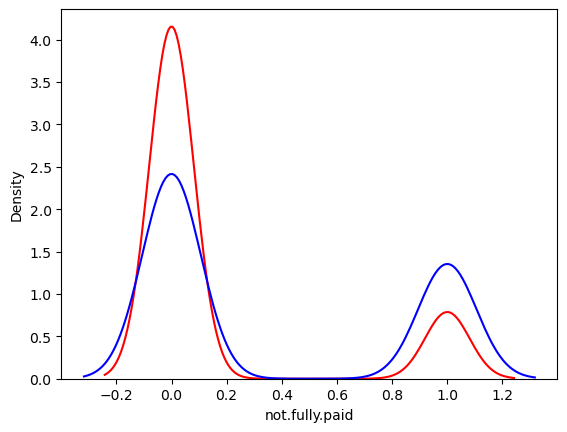

In [87]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

### Cross Validation Score

In [88]:
scores = cross_val_score(rf, X_train, y_train, scoring='recall', cv=5)
print('Score:', scores)
print('Avg. Score', np.mean(scores))
print('Std. Score', np.std(scores))

Score: [0.54065041 0.56910569 0.59591837 0.53469388 0.49593496]
Avg. Score 0.5472606603617057
Std. Score 0.03370674972700089
